## Logistic Regression

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

**Logistic regression is a supervised learning algorithm used in Classification problem where we need to classify the input in one of the given classes.**

$$h_{\theta}(x) = g(\theta^{T}*x) = \frac{1} {1+e^{-\theta^{T}*x}}   $$ where

$$ g(z) = \frac{1} {1+e^{-z}} $$


User defined classification criterion : 


**Prediction:** 

$\hat{y} =1$ (Class 1) if $\theta^{T}*x >= 0 $ or $ h_{\theta}(x) >= 0.5 $
            
$\hat{y} =0$ (Class 0) if $\theta^{T}*x < 0 $ or $ h_{\theta}(x) < 0.5 $
   
**Decision boundary** is determined by using the condition $\theta^{T}*x = 0 $


## **General approach** 

Hypothesis of Logistic regression
$h_{\theta}(x) =p(\hat{y}=1|x) $

**Prediction:** 

$\hat{y} =1$ (Class 1) if $ h_{\theta}(x) >= T $
            
$\hat{y} =0$ (Class 0) if $ h_{\theta}(x) < T $

where $T$ is the user-defined threshold


Text(0, 0.5, 'probability')

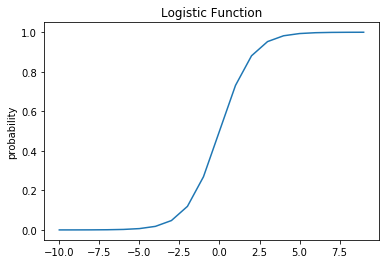

In [31]:
x= np.arange(-10,10)
y= 1/(1+np.exp(-x))

plt.plot(x,y)
plt.title('Logistic Function')
plt.ylabel('probability')
# Pending : Add a y=0.5 line in the graph

**Linearly seperable data**

If there exists at least one straight line which seperates/classify existing data into 2 classes, then we say that data is linearly seperable.




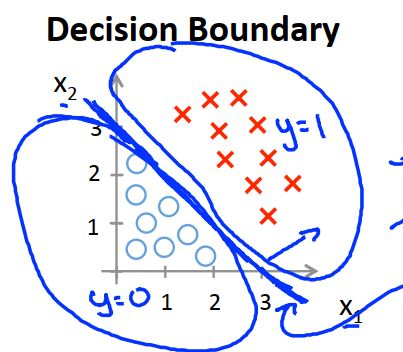

In [37]:
Image("D:\General\Fall 2018_Spring 2019\Course Work\Machine Learning\Summary and code\Logistic reg\Linear_seperable data.JPG",width=300,height=300)

Note that in case data is not linearly separable, we can still use Logistic regression to seperate data points by using Quadratic/polynomial terms which can result into non-linear decision boundaries.

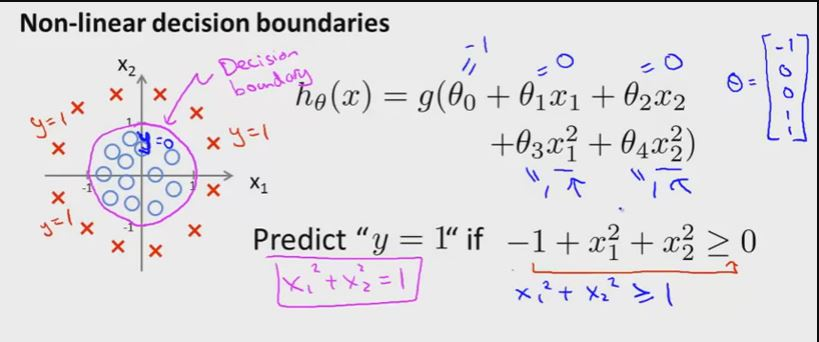

In [50]:
Image("D:\General\Fall 2018_Spring 2019\Course Work\Machine Learning\Summary and code\Logistic reg\Image_3.JPG", width=400,height=400)

# Cost function in Logistic Regression

We need to find a cost function in order to find estimates of the parameters used in the hypothesis of logistic regression. 

Note: If we use Quadratic loss function for logistic regression, we will get multiple local minima. In other words, it will not be a convex function. Hence, in order to maximise the penalty of errors we develop a new loss function known as **Cros-Entropy loss function**.

For a single example:

$\begin{align*}  & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$



Combining the above 2 conditions: 

$\mathrm{Cost}(h_\theta(x),y) = - ( \ y* \ \log(h_\theta(x)) + (1 - y) *\log(1 - h_\theta(x)) \ )$


**IMP: Note that writing the cost function in this way guarantees that cost function is convex for logistic regression.** Primary idea is to show that if $f''(x)>=0$ then function is convex. 
Reference: 
- https://math.stackexchange.com/questions/1582452/logistic-regression-prove-that-the-cost-function-is-convex
- https://www.cs.mcgill.ca/~dprecup/courses/ML/Lectures/ml-lecture05.pdf

Note that: 

$\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{  if  } h_\theta(x) = y =0 \ or \ h_\theta(x) = y = 1
\newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{  if  } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{  if  } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}$


In order to get a single number for all the observation, we find average cost/deviation/error

$ J(\theta) =  \frac{1}{m} \sum_{i}^{m} -[ \ y^{(i)} * \log(h_\theta(x^{(i)})) + (1-y^{(i)})*\log(1 - h_\theta(x^{(i)})\ ) \ ]  $


**Vectorized Implementation** 

$\begin{align*}
& h = g(X\theta)\newline
& J(\theta)  = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right)
\end{align*}$

# Optimization and Gradient Descent

In order to $ \underset{\theta}{ \mathrm{min} } \ J(\theta)    $ we use Gradient Descent algorithm to find the global minima


**Gradient Descent**

General Form

$\begin{align*}& Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\theta) \newline & \rbrace\end{align*}$


After doing partial differentiation

$\begin{align*}
& Repeat \; \lbrace \newline
& \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace
\end{align*}$


The above Gradient Descent form is similar to that found for Linear regression. Although, $h_{\theta}(x^{(i)})$ has different functional form in both cases.

$$h_{\theta}(x^{(i)}) = g(\theta^{T}*x^{(i)}   ) = \frac{1} {1+e^{-\theta^{T}* x^{(i)}    }}$$

**Proof:**

Reference : https://www.coursera.org/learn/machine-learning/resources/Zi29t

$ \begin{align*}\sigma(x)'&=\left(\frac{1}{1+e^{-x}}\right)'=\frac{-(1+e^{-x})'}{(1+e^{-x})^2}=\frac{-1'-(e^{-x})'}{(1+e^{-x})^2}=\frac{0-(-x)'(e^{-x})}{(1+e^{-x})^2}=\frac{-(-1)(e^{-x})}{(1+e^{-x})^2}=\frac{e^{-x}}{(1+e^{-x})^2} \newline &=\left(\frac{1}{1+e^{-x}}\right)\left(\frac{e^{-x}}{1+e^{-x}}\right)=\sigma(x)\left(\frac{+1-1 + e^{-x}}{1+e^{-x}}\right)=\sigma(x)\left(\frac{1 + e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}}\right)=\sigma(x)(1 - \sigma(x))\end{align*} $


$\begin{align*}\frac{\partial}{\partial \theta_j} J(\theta) &= \frac{\partial}{\partial \theta_j} \frac{-1}{m}\sum_{i=1}^m \left [ y^{(i)} log (h_\theta(x^{(i)})) + (1-y^{(i)}) log (1 - h_\theta(x^{(i)})) \right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} \frac{\partial}{\partial \theta_j} log (h_\theta(x^{(i)}))   + (1-y^{(i)}) \frac{\partial}{\partial \theta_j} log (1 - h_\theta(x^{(i)}))\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)})}{h_\theta(x^{(i)})}   + \frac{(1-y^{(i)})\frac{\partial}{\partial \theta_j} (1 - h_\theta(x^{(i)}))}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} \frac{\partial}{\partial \theta_j} \sigma(\theta^T x^{(i)})}{h_\theta(x^{(i)})}   + \frac{(1-y^{(i)})\frac{\partial}{\partial \theta_j} (1 - \sigma(\theta^T x^{(i)}))}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} \sigma(\theta^T x^{(i)}) (1 - \sigma(\theta^T x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{h_\theta(x^{(i)})}   + \frac{- (1-y^{(i)}) \sigma(\theta^T x^{(i)}) (1 - \sigma(\theta^T x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{h_\theta(x^{(i)})}   - \frac{(1-y^{(i)}) h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} (1 - h_\theta(x^{(i)})) x^{(i)}_j - (1-y^{(i)}) h_\theta(x^{(i)}) x^{(i)}_j\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} (1 - h_\theta(x^{(i)})) - (1-y^{(i)}) h_\theta(x^{(i)}) \right ] x^{(i)}_j \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} - y^{(i)} h_\theta(x^{(i)}) - h_\theta(x^{(i)}) + y^{(i)} h_\theta(x^{(i)}) \right ] x^{(i)}_j \newline&= - \frac{1}{m}\sum_{i=1}^m \left [ y^{(i)} - h_\theta(x^{(i)}) \right ] x^{(i)}_j  \newline&= \frac{1}{m}\sum_{i=1}^m \left [ h_\theta(x^{(i)}) - y^{(i)} \right ] x^{(i)}_j\end{align*}$


The vectorized version:

$ \bigtriangledown{J(\theta)} =  \frac{1}{m} * X^{T} . (\ g(X.\theta) - \overrightarrow{y} \ ) $

$\begin{align*}
& Repeat \; \lbrace \newline
& \; \theta_j := \theta_j - \alpha \bigtriangledown{J(\theta)} \newline & \rbrace
\end{align*}$



#### Advanced algorithms

In order to speed up optimization, we can advanced algorithms like Conjugate gradient descent, BFGS or L-BFGS instead of Gradient descent algorithms. But even these functions need to know how the cost and gradient are computed at each value of $\theta$.

### Multi-class classification

In case we have multiple classes for the data, we can still use logistic regression by training multiple models. In each model, we will keep one of the class as 1 and assign all other classes as 0. 

For a new observation $x$, we will assign observation $x$ the class $i$ which solves the maximization problem
$\underset {i}{ \mathrm{max} } \ h_{\theta}^{(i)} (x)  $

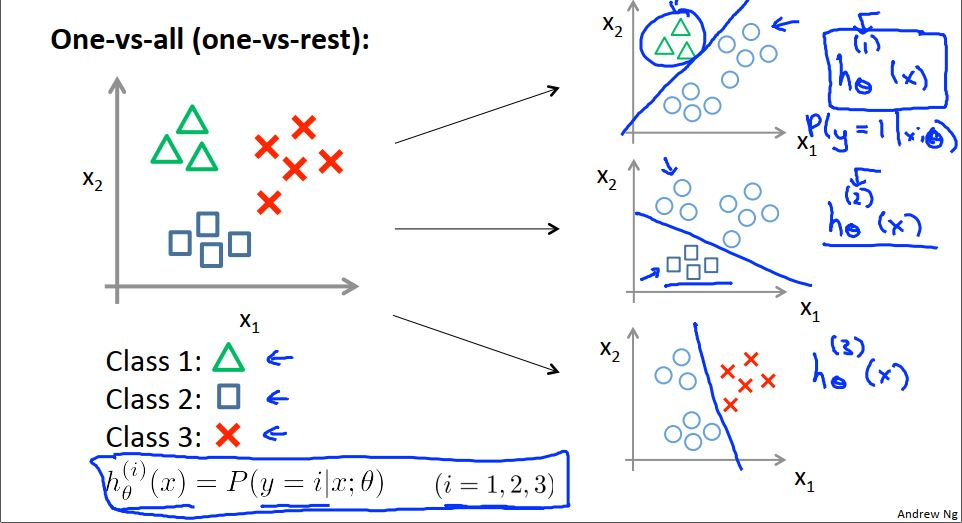

In [35]:
Image("D:\General\Fall 2018_Spring 2019\Course Work\Machine Learning\Summary and code\Logistic reg\Multi_class.JPG",width=500,height=500)

## Pending

- one-hot vector
- Softmax vector

# Regularization

Regularization is used to address the problem of overfitting. 

Pending: Is $\lambda$ always greater than zero ? ?


**Overfitting or High Variance** means that model/algorithm fits the training data very well, but this results into poor generalization (prediction) for new examples.
In other words, Overfitting occurs if we have too many features, the learned hypothesis may fit the training set very well, but fail to generalize to new examples. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.

**Underfitting or High Bias** occurs when the form of our hypothesis function $h_{\theta}(x) $ maps poorly to the trend of the data. It is usually caused by a function that is too simple or uses too few features.


Methods/options to address problem of overfitting: 


1. Reduce number of features
    * Manually select which features to keep.
    * Use feature/model selection algorithm


2. Regularization
    * Keep all the features, but reduce magnitude/values of parameters .
    * Works well when we have a lot of features, each of which contributes a bit to predicting .


Use this link to get an idea how regularization affects the minimum attained by a function

https://www.desmos.com/calculator/1hexc8ntqp

# Regularized Cost of Linear Regression

$J(\theta) = \frac{1}{2*m} * [ \sum_{i=1}^{m} ( y^{(i)} - h_{\theta}(x^{(i)}) )^{2} + \lambda*\sum_{j=1}^{n}\theta_{j}^{2} ] $

Note that we don't use $\theta_{0}$ with regularization term since even if we use a very large value of $\lambda$, our hypothesis would output equal to $\theta_{0}$

Also, we apply the multiplicative term $\frac{1}{2*m} $ to the sum which includes regularization term otherise terms associated with regularizaton will always be penalized irrespective of value of $\lambda$. This is because if $m$ is large then the first time will always be small. 

### Iterative Method

$\begin{align*}
& \text{Repeat}\ \lbrace \newline
& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline
& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline
& \rbrace
\end{align*}$


### Normal Equation method

$\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}$

**Pending** Recall that if m ≤ n, then $X^{T}X$ is non-invertible. However, when we add the term $\lambda.L$ , then $X^{T}X + \lambda.L $ becomes invertible.


# Pending

Demonstration of Regularization

In [64]:
x= [ a for a in range(0,10)]
print(x)

y= np.sqrt(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


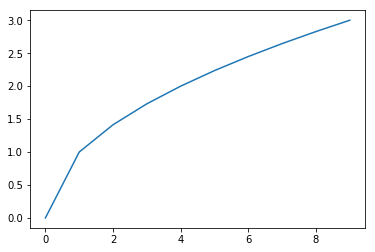

In [65]:
plt.plot(x,y)

In [ ]:
from sklearn import LinearRegression

# Regularized Cost of Logsitic Regression


$ J(\theta) =  \frac{1}{m} \sum_{i}^{m} -[ \ y^{(i)} * \log(h_\theta(x^{(i)})) + (1-y^{(i)})*\log(1 - h_\theta(x^{(i)})\ ) \ ] + \frac{\lambda}{2m}*\sum_{j=1}^{n}\theta_{j}^{2} $

**Gradient Descent/Iterative method**

$\begin{align*}& \text{Repeat}\ \lbrace \newline& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline& \rbrace\end{align*}$

*Note that this is identical to the gradient descent function presented for linear regression.*

# Pending

* Area under curve
* ROC
* Classification metric
* Recall / precision